In [1]:
import os
import pandas as pd
import datetime, time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_hdf("all_wind_clean.h5")    

In [3]:
df2=df[df.timeStamp=="2018-01-24__20~36~56"]

In [4]:
df2["wind_direction"] = 0
df2.wind_direction[df2.trajectory__case==1]=180
df2.wind_direction[df2.trajectory__case==2]=270
df2.wind_direction[df2.trajectory__case==3]=0
df2.wind_direction[df2.trajectory__case==0]=df2[df2.trajectory__case==0].trajectory__pOri_x+180

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/lsr/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(ne

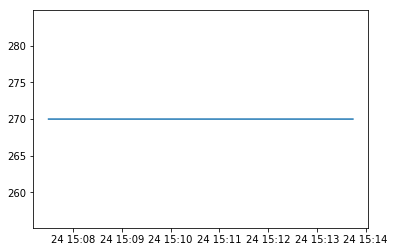

In [7]:
plt.plot(df2.wind_direction[df2.trajectory__case==2])

In [8]:
df2=df2.assign(wind_wrt_fly=df2.trajectory__pOri_x.values-df2.wind_direction.values)

In [9]:
df2["wind_wrt_fly_normalized"]=0
df2=df2.assign(wind_wrt_fly_normalized = df2["wind_wrt_fly"].values%360)

In [10]:
df2.wind_wrt_fly_normalized[df2.wind_wrt_fly_normalized.values>180] = df2.wind_wrt_fly_normalized[df2.wind_wrt_fly_normalized.values>180]-360 

/home/lsr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2=df2.assign(wind_wrt_fly_normalized_abs =np.abs(df2.wind_wrt_fly_normalized.values ))

In [13]:
def print_structure(df):
    files = df.timeStamp.unique()
    for file in files:
        runs=df[df.timeStamp==file].trajectory__runNum.unique()
        for run in runs:
            case_=df[(df.timeStamp==file) & (df.trajectory__runNum==run)].trajectory__case.unique()
            #print(run,case_)
            for c in case_:
                s=df[(df.timeStamp==file) & (df.trajectory__runNum==run) & (df.trajectory__case==c)].shape
                print("F:",file,"_","R:",run,"_","C:",c,"_","S:",s)

In [14]:
print_structure(df2)

F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 0.0 _ S: (2396, 25)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 1.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 2.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 3.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 0.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 1.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 2.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 3.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 0.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 1.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 2.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 3.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 0.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 1.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 2.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 3.0 _ S: (2397, 25)
F: 2018-01-24__20~36~56 _ R: 5.0 _ C: 0.0 _ S: (2397, 25)
F: 2018-01-24_

In [17]:
def add_diff_wind(df):
    files = df.timeStamp.unique()
    df["wind_wrt_fly_diff"]=0
    for file in files:
        runs=df[df.timeStamp==file].trajectory__runNum.unique()
        for run in runs:
            case_=df[(df.timeStamp==file) & (df.trajectory__runNum==run)].trajectory__case.unique()
            #print(run,case_)
            for c in case_:
                d=np.diff(df[(df.timeStamp==file) & (df.trajectory__runNum==run) & (df.trajectory__case==c)].wind_wrt_fly.values)
                d=np.append(d,0)
                df.loc[(df.timeStamp==file) & (df.trajectory__runNum==run) & (df.trajectory__case==c),"wind_wrt_fly_diff"]=d
    return df

In [18]:
df2_w_diff=add_diff_wind(df2)

In [19]:
print_structure(df2_w_diff)

F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 0.0 _ S: (2396, 26)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 0.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 0.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 0.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 5.0 _ C: 0.0 _ S: (2397, 26)
F: 2018-01-24_

In [20]:
df2_w_diff.columns

Index(['trajectory__DCoffset', 'trajectory__case', 'trajectory__groundSpeed',
       'trajectory__headingControl', 'trajectory__isFlying',
       'trajectory__pOri_x', 'trajectory__pPos_x', 'trajectory__pPos_y',
       'trajectory__pPos_z', 'trajectory__reset', 'trajectory__runNum',
       'trajectory__servoAngle', 'trajectory__slip', 'trajectory__speed',
       'trajectory__trial', 'trajectory__wbad', 'trajectory__wbas',
       'windPressure', 'visual', 'flowSource', 'timeStamp', 'wind_direction',
       'wind_wrt_fly', 'wind_wrt_fly_normalized',
       'wind_wrt_fly_normalized_abs', 'wind_wrt_fly_diff'],
      dtype='object')

In [21]:
df_test=df2_w_diff.loc[(df.trajectory__case!=0.0),:]

In [22]:
print_structure(df_test)

F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 1.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 2.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 3.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 4.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 5.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 5.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 5.0 _ C: 3.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 6.0 _ C: 1.0 _ S: (2397, 26)
F: 2018-01-24__20~36~56 _ R: 6.0 _ C: 2.0 _ S: (2397, 26)
F: 2018-01-24_

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [33]:
from sklearn import model_selection

In [24]:
idx=df_test.iloc[::2397,:].index
df_test=df_test.drop(index=idx)

In [30]:
rf=RandomForestRegressor(n_estimators=400,min_samples_split=5
                             ,min_samples_leaf=1,
                             max_depth=90)

In [ ]:
model_selection.train_test_split()

In [34]:
2397*15

35955

In [52]:
train=df_test.loc[df_test.trajectory__runNum<6,:]
test=df_test.loc[df_test.trajectory__runNum>5,:]

In [53]:
rf.fit(train.wind_wrt_fly_normalized.values.reshape(-1,1),train.wind_wrt_fly_diff.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
y_pred=rf.predict(test.wind_wrt_fly_normalized.values.reshape(-1,1))

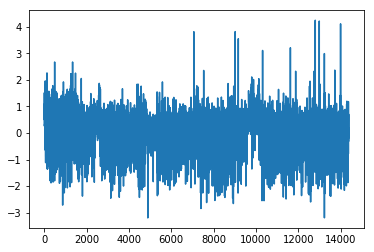

In [55]:
plt.plot(y_pred)

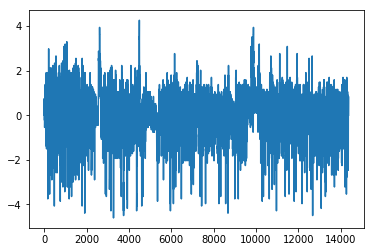

In [56]:
plt.plot(test.wind_wrt_fly_diff.values)

In [42]:
from sklearn.metrics import accuracy_score


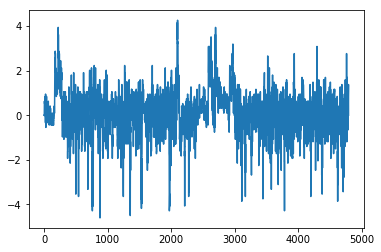

In [62]:
plt.plot(test[(test.trajectory__case==2)].wind_wrt_fly_diff.values)

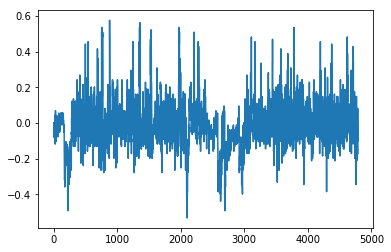

In [65]:
plt.plot(test[(test.trajectory__case==2)].trajectory__wbad.values)

In [66]:
actual_x=test[(test.trajectory__runNum==6) & (test.trajectory__case==2)].wind_wrt_fly_normalized.values
actual_y=test[(test.trajectory__runNum==6) & (test.trajectory__case==2)].wind_wrt_fly_diff.values

In [68]:
y_predict=rf.predict(actual_x.reshape(-1,1))

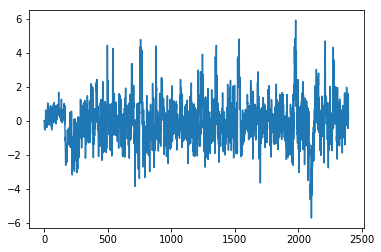

In [69]:
plt.plot(y_predict-actual_y)

In [70]:
from sklearn.metrics import r2_score

In [73]:
r2_score(actual_y,y_predict)

-0.1891340739787759

In [72]:
actual_y.shape

(2396,)

In [74]:
from sklearn.tree import export_graphviz

In [76]:
est=rf.estimators_[1]

In [78]:
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image

dot_data = StringIO()
export_graphviz(est,out_file=dot_data,
                feature_names = ["wind_wrt_fly_normalized"],
                class_names = ["wind_wrt_fly_diff"],
                rounded = True, proportion = False, 
                precision = 2, filled = True
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

KeyboardInterrupt: 